# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





# Maximum Likelihood Estimation

Suppose we have the outcome of some experiment as a series of results $X_1, X_2, ..., X_n$ of independent trials of some process. We suspect that a good way to describe our experiments is a probabilistic model, that is our results all come from repeatedly sampling from an underlying probability distribution. Suppose that we are able to identify a good candidate distribution, say a Normal distribution, or a Bernoulli one. We may describe the probability of observing one particular $X_i$ as $f(X_i)$ or, more explicitly, $f(X_i|\theta)$. In this case θ represents the parameters upon which the precise shape of distribution $f$ depends, e.g. θ = (μ,σ) in case of a Normal distribution.

If we only have access to the samplings, we usually want to know also what are the best values of the parameters θ for describing the process we are seeing. One way of doing this is to choose the parameters θ so that the probability of observing exactly what we saw is maximal. The basic idea here is that, no additional information given, the most sensible thing to assume is that we saw (one of) the most probable outcomes of the process. This procedure goes by the name of **Maximum Likelihood Estimation** (or MLE for short).

Given the name of the course, we would very much like to translate all of this nice reasoning in more mathematical terms.


Given our favorite underlying distribution $f(X|\theta)$, the probability of seeing a set of $n$ IID observations $\{X_i\}$ will be:
$$
L(\theta) = \prod_{i=1}^n f(X_i | \theta)
$$

This function is usually called **Likelihood**, since it describes how likely observed data are given the parameters. Finding the θ that maximize this function amounts to requiring:

$$
\hat \theta = argmax_\theta\ L(\theta)
$$

For practical reasons, it is usually analytically and computationally simpler to deal with the **Log-Likelihood** function instead:

$$
\log L(\theta) = \log \prod_{i=1}^n f(X_i | \theta) = \sum_{i=1}^n \log f(X_i | \theta)
$$

Note that since the $\log$ function is monotone, maximizing $L$ or $\log L$ will yield the same θ.

## Bernoulli $p$ MLE Estimation

A first almost trivial example is to use this machinery to estimate the only parameter $p$ of a Bernoulli distribution from a series of trials.

Suppose you have access to a (possibly unfair) coin that you can flip for $n$ times in a row. You decide that a reasonable model for this sistem is to treat the outcome of each flip as a Beronoulli variable with unknown probability $p$, that is $X_i \sim Ber(p)$. In this case your results will be a list of 1s and 0s, since $X_i \in \{0,1\}$.

The likelihood of a single trial will therefore be:
$$
f(X_i|p) = p^{X_i} (1-p)^{1-X_i}
$$

And the overall likelihood will be:
$$
L(p) = \prod_{i=0}^{n} p^{X_i} (1-p)^{1-X_i}
$$

which in turn define our final target, the overall log-likelihood:
$$
\log L(p) = \sum_{i=0}^{n} \log [p^{X_i} (1-p)^{1-X_i}]
$$



*Example:* Suppose you see the sequence $[1,0,1,1,0]$. Under the Bernoulli assumption, the probability of this outcome (that is, the likelihood) is  $L(p) = p(1-p)pp(1-p) = p^3 (1-p)^2$. The log-likelihood will be $\log L(p) = 3 \log p + 2 \log (1-p)$.

### Analytic derivation

In this case, the mathematics involved is so simple that allows for a very straightforward analytic solution.

The log-likelihood only depends on one parameter $p$, and can be maximized by setting $\frac{d}{dp} \log L(p) = 0$. Since $\log L$ is convex in $p$ (it is a sum of convex functions) there will be a single extreme point to find, our solution.

Let's work out a more explicit expression for $\log L(p)$.
$$
\begin{align}
\log L(p) &= \sum_{i=0}^{n} \log [p^{X_i} (1-p)^{1-X_i}] \\
      &= \sum_{i=0}^{n} [X_i \log p + (1-X_i) \log (1-p)] \\
      &= \log p \sum_{i=0}^{n} X_i + \log (1-p) \sum_{i=0}^{n} (1-X_i) \\
      &= S \log p + (n-S) \log (1-p)
\end{align}
$$

where $ S = \sum_{i=0}^{n} X_i$ is the total number of successes.

Now we tak the derivative and set it to 0:
$$
\frac{d}{dp} \log L(p) = S \frac{1}{p} + (n - S) \frac{-1}{1-p} = 0
$$

which yields:
$$
\hat p = \frac{S}{n} = \frac{1}{n} \sum_{i=0}^{n} X_i
$$

We discovered that the MLE estimator for the parameter $p$ of a Bernoulli distribution is the **sample mean**.

### Computational estimation

For the sake of exemplification in a simple case, suppose we cannot compute any analytic expression for the estimation of $p$. We still still have one string to our bow, trying to minimize the log-likelihood numerically.

Provided we can come up with a reasonable guess for the likelihood function, we can try to approximate the solution to the argmax by numerically looking for a θ that is close enough to the true solution.

Cominig up with *some* likelihood function is usually possible, by introducing some hypothesis like IID sampling and a specific simple form for $f(X_i|\theta)$ (fairly often a Gaussian).

The minimization of such likelihood is usually not trivial. Notice that we said the log-likelihood is **convex in $p$**, but $p$ itself is usually a function of some parameters, that is $p = p(\theta)$. Unless we carefully construct $p(\theta)$ to be convex too, there is in general **no reason to assume that it will be** (and in fact in a lot of cases it's not).

**NOTE:** Most optimization routines readily available in software packages are implemented for **minimization** instead of maximization. For this reason computational approaches usually require the use of the **NEGATIVE LOG-LIKELIHOOD**. Minimizing the negative of the log-likelihood is equivalent to maximizing the log-likelihood, so this is just an implementation detail and does not change any theoretical consideration.


### Basic example

We will generate a synthetic dataset by defining a Bernoulli variable and sampling a certain number of times from it. The aim will then be to infer with MLE the (hidden) value we chose for $p$ from the data we generated and compare it to the analytic and to the true value.

In [ ]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

#### Generate synthetic data

In [ ]:
# choose the true value for the prob of Bernoulli trials
p = .3

# choose number of trials
n = 50

# sample from distribution
data = (np.random.uniform(size=n) < p).astype(int)

print(f'Trial results:\n{data}')

Trial results:
[0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 1 0 0 0 1 0 1 0 0]


#### Analytic estimate (sample mean)

In [ ]:
p_analytic = np.mean(data)

print(f'Analytic min. p = {p_analytic:.5f}')

Analytic min. p = 0.36000


#### Numerical estimate (max log-likelihood)

In [ ]:
# define bernoulli log-likelihood
def NLL_bernoulli(p, trials):
    '''Bernoulli negative log-likelihood'''

    neg_log_likelihood = -np.sum(trials * np.log(p) + (1 - trials) * np.log(1 - p))

    return neg_log_likelihood

In [ ]:
# initial (random) guess for p
p_init = np.random.uniform()

# minimize with scipy routines
# bounds is used to constrain optimizer to stay in regions where taking log(p) makes sense
epsilon = 1e-5
opt_results = scipy.optimize.minimize(lambda p: NLL_bernoulli(p, data),
                                      p_init,
                                      bounds=[(0. + epsilon, 1. - epsilon)])

p_numeric = opt_results.x.squeeze()

print(f'Numeric min. p = {p_numeric:.5f}')

Numeric min. p = 0.36000


#### Compare results

In [ ]:
print(f'True value\t\t p = {p:.3f}')
print(f'Analytic estimate\t p = {p_analytic:.3f}')
print(f'Numeric estimate\t p = {p_numeric:.3f}')

True value		 p = 0.300
Analytic estimate	 p = 0.360
Numeric estimate	 p = 0.360


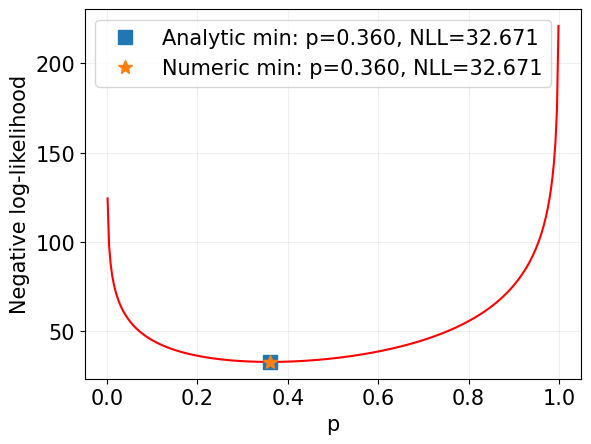

In [ ]:
# generate complete NLL curve
# NOTE: it's feasible only since we have to scan ONE single parameter in a bounded region!!!
ps = np.linspace(.001,.999,300)
lls = np.asarray([NLL_bernoulli(pp, data) for pp in ps])
plt.plot(ps, lls, 'r-')

# show estimates for p
plt.plot(p_analytic, NLL_bernoulli(p_analytic, data), 's', markersize=10, label=f'Analytic min: p={p_numeric:.3f}, NLL={NLL_bernoulli(p_analytic, data):.3f}')
plt.plot(p_numeric, NLL_bernoulli(p_numeric, data), '*', markersize=10, label=f'Numeric min: p={p_numeric:.3f}, NLL={NLL_bernoulli(p_numeric, data):.3f}')


plt.xlabel('p')
plt.ylabel('Negative log-likelihood')

plt.grid(alpha=.2)
plt.legend();

## Sum of Bernoulli variables

We will now deal with a problem slightly less trivial than the fit of a Bernoulli variable. As it happens, this example bear some similarity to one of the application that will be seen in this course.

The problem goes as follows. Suppose now that each observation $X_i$ is not the outcome of a single coin flip, but the sum of the results of of two coins flipped in parallel. In mathematical terms we can say that, given two Bernoulli random variables $Z_i^{(1)}, Z_i^{(2)} \sim Bernoulli(p)$, we define the random variable $X_i = Z_i^{(1)} + Z_i^{(2)}$. In this case we will have that $X_i \in \{0,1,2\}$.

Note that each of the possible outcomes will have a different probability, dependent on the underlying probability $p$ of the Bernoulli variables. We have that:
$$
P(X_i = 0) = P(Z_i^{(1)} = 0) P(Z_i^{(2)} = 0) = (1 - p)^2 \\
P(X_i = 1) = P(Z_i^{(1)} = 0) P(Z_i^{(2)} = 1) + P(Z_i^{(1)} = 1) P(Z_i^{(2)} = 0) = 2 p (1 - p) \\
P(X_i = 2) = P(Z_i^{(1)} = 1) P(Z_i^{(2)} = 1) = p^2 \\
$$

Suppose now that we observe a total number N of such paired coin flips and we record the results. We end up seeing $n_0$ events where $X_i = 0$, $n_1$ events where $X_i = 1$ and $n_2$ events where $X_i = 2$. The likelihood of our observation will be:

$$
\begin{align}
L(p) &= [P(X_i = 0)]^{n_0}[P(X_i = 1)]^{n_1}[P(X_i = 2)]^{n_2} \\
      &= [(1 - p)^2]^{n_0}[2 p (1 - p)]^{n_1}[p^2]^{n_2}
\end{align}
$$

From this point on we can proceed in the usual way. We can try to find the optimal $p$ analytically or we define the negative log-likelihood as $NLL(p) = - \log L(p)$ and we try to minimize it numerically.

#### Generate synthetic data

In [ ]:
# choose the true value for the prob of Bernoulli trials
p = .7

# choose number of trials
N = 50

# generate coin flips as (N,2) matrix
# (recall that each of the N trials is the flip of two coins)
data = (np.random.uniform(size=(N,2)) < p)
data = data.sum(1).astype(int) #sum over rows to get the final values

print(f'Trial results:\n{data}')

Trial results:
[2 2 2 2 2 1 2 1 2 2 2 1 0 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 1
 1 1 0 1 2 1 2 2 2 2 1 1 1]


#### Analytic estimate

Also in this case, we can calculate the MLE of $p$ analytically by setting $\frac{d}{dp} \log L(p) = 0$. After a bit of algebra we reach the conclusion that the estimator of $p$ has the form:
$$
\hat p = \frac{2 n_2 + n_1}{2 N}
$$

In [ ]:
n0, n1, n2 = np.bincount(data)

p_analytic =  (2*n2 + n1)/(2 * N)

print(f'Analytic min. p = {p_analytic:.5f}')

Analytic min. p = 0.68000


#### Numerical estimate

In [ ]:
# define bernoulli log-likelihood
def NLL(p, trials):
    '''Negative log-likelihood for sum of double coin flips'''

    # count outcome occurrences
    n0, n1, n2 = np.bincount(data)

    log_likelihood =  2*n0*np.log(1 - p) + n1*(np.log(2)+np.log(p)+np.log(1 - p)) + 2*n2*np.log(p)

    return -log_likelihood

In [ ]:
# initial (random) guess for p
p_init = np.random.uniform()

# minimize with scipy routines
# bounds is used to constrain optimizer to stay in regions where taking log(p) makes sense
epsilon = 1e-5
opt_results = scipy.optimize.minimize(lambda p: NLL(p, data),
                                      p_init,
                                      bounds=[(0. + epsilon, 1. - epsilon)])

p_numeric = opt_results.x.squeeze()

print(f'Numeric min. p = {p_numeric:.5f}')

Numeric min. p = 0.68000


### Compare results

In [ ]:
print(f'True value\t\t p = {p:.3f}')
print(f'Analytic estimate\t p = {p_analytic:.3f}')
print(f'Numeric estimate\t p = {p_numeric:.3f}')

True value		 p = 0.700
Analytic estimate	 p = 0.680
Numeric estimate	 p = 0.680


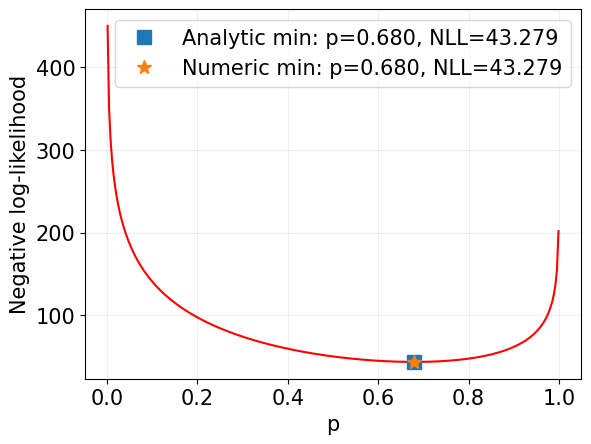

In [ ]:
# generate complete NLL curve
# NOTE: it's feasible only since we have to scan ONE single parameter in a bounded region!!!
ps = np.linspace(.001,.999,300)
lls = np.asarray([NLL(pp, data) for pp in ps])
plt.plot(ps, lls, 'r-')

# show estimates for p
plt.plot(p_analytic, NLL(p_analytic, data), 's', markersize=10, label=f'Analytic min: p={p_numeric:.3f}, NLL={NLL(p_analytic, data):.3f}')
plt.plot(p_numeric, NLL(p_numeric, data), '*', markersize=10, label=f'Numeric min: p={p_numeric:.3f}, NLL={NLL(p_numeric, data):.3f}')


plt.xlabel('p')
plt.ylabel('Negative log-likelihood')

plt.grid(alpha=.2)
plt.legend();

# (Stub) Standard deviation of the mean

One could reasonably expect that, in both examples, the more samples we have, the more precise our estimate of $p$ will be. But how much more precise?

- Choose values for $p$ and $n$ that you like. Draw a number of datasets of size $n$ and estimate $\hat p$ from each of them.

- Plot and analyze the distribution of values of $\hat p$. How close is the average $<\hat p>$ to the real $p$? what is the standard deviation of the distribution?

- Repeat the same procedure for increasing $n$. Track and plot the variance of the distribution of $\hat p$ for each $n$. Can you take a reasonable guess for the scaling behavior?

**HINT:** What you are calculating is the so-called *standard deviation of the mean*. For a Bernoulli variable, it is supposed to scale as $\frac{1}{\sqrt n}$.